# Calculating Rate of Return
Every investors main goal is to earn a good rate of return on his investment.
Therefore we need a measure that ensures comparability between investments with different market prices.There are 2 ways to calculate rate of return.
1.Simple Rate of return
2.Logarithimic rate of return.

**Note**-- when we have to deal with multiple assets over the same timeframe log returns are preferable.


In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [18]:
PG=wb.DataReader('PG',data_source='yahoo',start='1995-1-1')
#We are simply importing Proctor and Gamble data from Yahoo Finance for the period from the first of
#January 1995 until today to confirm we did this operation correctly.

In [19]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.280613
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.230266
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.142162
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.154748
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.129573


In [20]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-14,139.580002,138.330002,138.440002,138.630005,4767400.0,138.630005
2020-09-15,139.770004,138.389999,138.789993,138.630005,4046500.0,138.630005
2020-09-16,140.169998,137.600006,139.570007,137.699997,6049900.0,137.699997
2020-09-17,137.880005,136.190002,137.059998,137.520004,4648500.0,137.520004
2020-09-18,137.759995,136.899994,136.910004,137.490005,2730238.0,137.490005


In [21]:
#a simple rate of return can be calculated as the difference between 
#the stock's price on Day 1 minus its price on day 0 divided by the price on days 0 and when we say price
#we mean adjusted closing price.
#(p1-p0)/p0=(p1/p0)-1

In [22]:
PG['simple_return']=(PG['Adj Close']/PG['Adj Close'].shift(1))-1
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-09-14    0.003547
2020-09-15    0.000000
2020-09-16   -0.006709
2020-09-17   -0.001307
2020-09-18   -0.000218
Name: simple_return, Length: 6475, dtype: float64


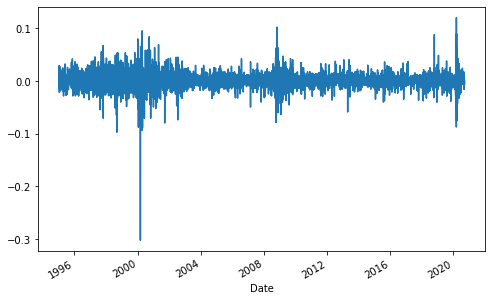

In [23]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [24]:
# calculate the mean return of P and G throughout the period under analysis.
avg_returns_d=PG['simple_return'].mean()
avg_returns_d
#This number looks really small.
#So lets calculate average annual rate of return, it would be more meaningful.

0.0005799866837065302

In [25]:
#The data we extracted is not composed of 365 observations per year.
#It excludes non trading days such as Saturday Sundays and bank holidays.
#The number of trading days per year is around 250 sometimes 251.
#At other times 252.
#So let's use the number 250.
avg_returns_a=PG['simple_return'].mean()*250
print (str(round(avg_returns_a,5)*100)+' %')

14.499999999999998 %


In [26]:
#Since we are exploring the behaviour of single stock from 1995 till 2020, perhaps it will be better to use log returns
PG['log_return']=np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2020-09-14    0.003541
2020-09-15    0.000000
2020-09-16   -0.006731
2020-09-17   -0.001308
2020-09-18   -0.000218
Name: log_return, Length: 6475, dtype: float64


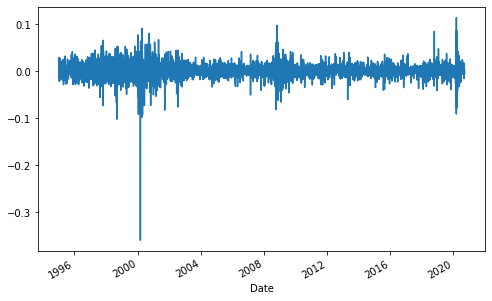

In [27]:
PG['log_return'].plot(figsize=(8,5))

In [28]:
log_returns_a=PG['log_return'].mean()*250
print (str(round(log_returns_a,5)*100)+' %')

11.917 %


# Calculating Rate of Return Over multiple Investments

In [29]:
tickers=['PG','MSFT','F','GE']
#PG=Procter & Gamble,MSFT=Microsoft,F=Ford,GE=General Electric
mydata=pd.DataFrame()
for t in tickers:
  mydata[t]=wb.DataReader(t,data_source='yahoo',start='1995-1-1')['Adj Close']


In [30]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6475 entries, 1995-01-03 to 2020-09-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6475 non-null   float64
 1   MSFT    6475 non-null   float64
 2   F       6475 non-null   float64
 3   GE      6475 non-null   float64
dtypes: float64(4)
memory usage: 252.9 KB


In [31]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.280613,2.401030,3.262354,2.725145
1995-01-04,6.230266,2.418484,3.350130,2.725145
1995-01-05,6.142162,2.378592,3.320871,2.731823
1995-01-06,6.154748,2.418484,3.320871,2.718464
1995-01-09,6.129573,2.403525,3.379390,2.691748


In [32]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-09-14,138.630005,205.410004,7.120,6.150
2020-09-15,138.630005,208.779999,7.040,6.100
2020-09-16,137.699997,205.050003,7.020,6.750
2020-09-17,137.520004,202.910004,7.280,7.050
2020-09-18,137.440002,201.130005,7.385,7.085


In [33]:
#create a line chart which will help understand how these securities
#performed throughout the timeframe under consideration
#Normalize to 100 i.e (pt/p0)*100
mydata.loc['1995-01-03']

PG      6.280613
MSFT    2.401030
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

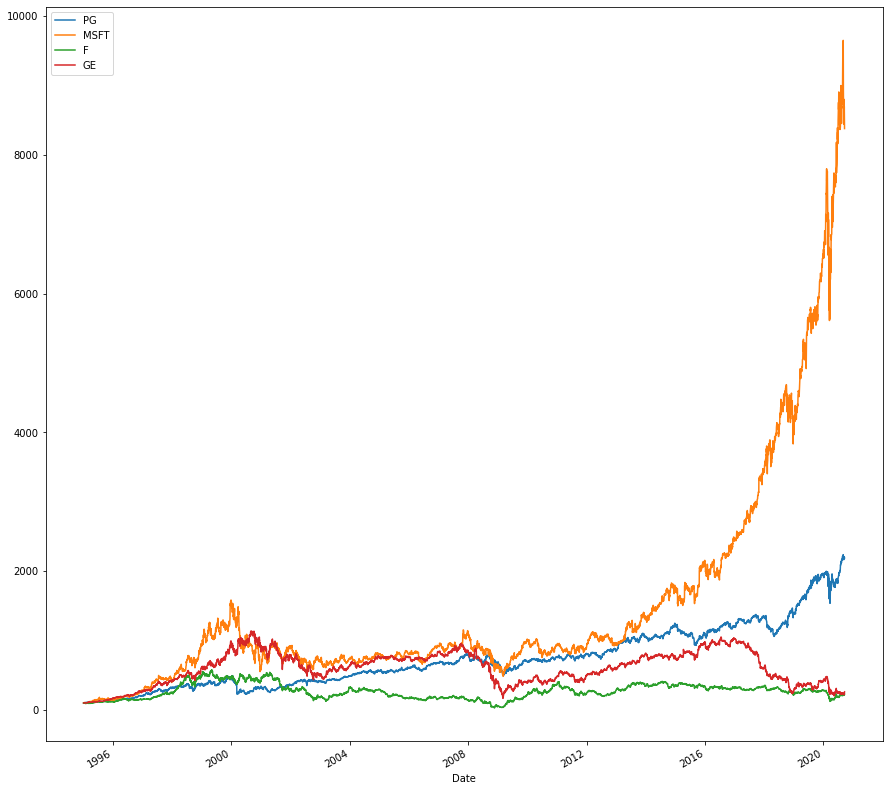

In [34]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,15))
plt.show()
#Microsoft is a fair winner.
#It beats the other stocks regarding stock price performance from 1995 until the end of 2004
#The moment of the global financial crisis(2008) General Electric performed better than Procter and Gamble.
#But apparently it could not sustain the tumble.
#Procter Gamble shares have cost more ever since finally Ford enjoyed a short time lead over G(near 2000)

In [35]:
#Calculating the return of the portfoliosecurites
returns=(mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [36]:
annual_returns=returns.mean()*250
annual_returns

PG      0.144983
MSFT    0.221160
F       0.111377
GE      0.088014
dtype: float64

In [37]:
weights=np.array([0.25,0.25,0.25,0.25])
np.dot(annual_returns,weights)

0.14138330853059833

In [38]:
portfolio1=str(round(np.dot(annual_returns,weights),5)*100)+' %'
print(portfolio1)

14.138 %


In [39]:
#to compare this combination with the performance of another portfolio.
#assign new weights for each stock.
weights2=np.array([0.4,0.4,0.15,0.15])

In [40]:
portfolio2=str(round(np.dot(annual_returns,weights2),5)*100)+' %'
print(portfolio2)

17.637 %
